# Caso Estudio:Técnicas Avanzadas de Optimización y la Función de Ackley

## Introducción a la Optimización y la Función de Ackley

La optimización es un aspecto fundamental de la ciencia computacional, donde el objetivo es encontrar la mejor solución a un problema dentro de un conjunto de posibles soluciones. Esta conferencia se centra en la función de Ackley, un popular problema de prueba para algoritmos de optimización debido a su complejo paisaje.

### Antecedentes Matemáticos de la Función de Ackley

La función de Ackley está diseñada para presentar un complejo paisaje de optimización con una multitud de mínimos locales, lo que la convierte en un candidato ideal para probar la robustez de los algoritmos de optimización. La función se define como:

$$
f(\mathbf{x}) = -a \exp\left(-b \sqrt{\frac{1}{d} \sum_{i=1}^{d} x_i^2}\right) - \exp\left(\frac{1}{d} \sum_{i=1}^{d} \cos(c x_i)\right) + a + e
$$

donde:
- $\mathbf{x} = [x_1, x_2, \ldots, x_d]$ es un vector de $d$ dimensiones.
- $a = 20$, $b = 0.2$ y $c = 2\pi$ son constantes que definen la forma de la función.

El mínimo global de la función se encuentra en $\mathbf{x} = 0$ con $f(\mathbf{0}) = 0$. El desafío radica en navegar por los muchos mínimos locales para encontrar este mínimo global.

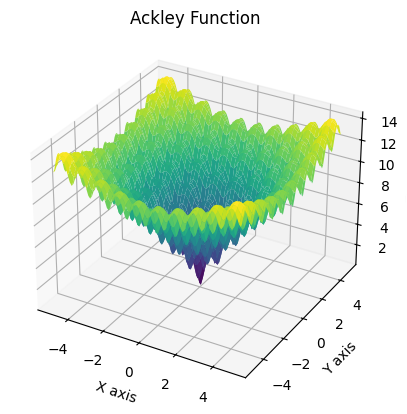

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ackley_function(x, y, a=20, b=0.2, c=2*np.pi):
    d = 2
    sum_sq_term = -a * np.exp(-b * np.sqrt((x**2 + y**2) / d))
    cos_term = -np.exp((np.cos(c*x) + np.cos(c*y)) / d)
    return sum_sq_term + cos_term + a + np.exp(1)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = ackley_function(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Ackley Function')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Exploración de Estrategias de Optimización

### Evolución Diferencial (DE)

La Evolución Diferencial es un método de optimización basado en la población que utiliza las diferencias entre las soluciones candidatas seleccionadas al azar para impulsar el proceso de optimización. Es especialmente efectivo para funciones multimodales como la función de Ackley.

#### Descripción General del Algoritmo DE

- **Inicialización**: Generar una población inicial de soluciones candidatas de manera aleatoria.
- **Mutación**: Para cada candidato, se genera un vector mutante añadiendo la diferencia ponderada entre dos vectores de la población a un tercer vector.
- **Cruce**: El vector mutante se mezcla con el candidato original para producir un vector de prueba.
- **Selección**: Si el vector de prueba produce un valor de función más bajo que el candidato original, lo reemplaza en la población.

#### Implementación

In [3]:
import numpy as np

# Ackley Function Definition
def ackley_function(x, a=20, b=0.2, c=2*np.pi):
    d = len(x)
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum(x**2) / d))
    cos_term = -np.exp(sum(np.cos(c*x) / d))
    return sum_sq_term + cos_term + a + np.exp(1)

# Differential Evolution Algorithm
def differential_evolution(ackley_func, bounds, pop_size, F, CR, generations):
    dim = len(bounds)
    # Initialize population within bounds
    pop = np.random.rand(pop_size, dim) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    # Evaluate the initial population
    fitness = np.array([ackley_func(ind) for ind in pop])
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    for gen in range(generations):
        for i in range(pop_size):
            idxs = [idx for idx in range(pop_size) if idx != i]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(a + F * (b - c), bounds[:, 0], bounds[:, 1])
            cross_points = np.random.rand(dim) < CR
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dim)] = True
            trial = np.where(cross_points, mutant, pop[i])
            trial_fitness = ackley_func(trial)
            if trial_fitness < fitness[i]:
                pop[i] = trial
                fitness[i] = trial_fitness
                if trial_fitness < fitness[best_idx]:
                    best_idx = i
                    best = trial
        print(f"Generation {gen}, Best Score: {fitness[best_idx]}")

    return best, fitness[best_idx]

# DE Parameters
bounds = np.array([[-5, 5]] * 2)  # Bounds for a 2-dimensional Ackley function
pop_size = 50  # Population size
F = 0.8  # Differential weight
CR = 0.9  # Crossover probability
generations = 100  # Number of generations

# Run Differential Evolution
best_solution, best_score = differential_evolution(ackley_function, bounds, pop_size, F, CR, generations)
print(f"\nBest Solution: {best_solution}, Best Score: {best_score}")

Generation 0, Best Score: 2.9256211348292926
Generation 1, Best Score: 1.7486181404509833
Generation 2, Best Score: 1.7486181404509833
Generation 3, Best Score: 1.7486181404509833
Generation 4, Best Score: 1.0926337106763104
Generation 5, Best Score: 0.9391529587463983
Generation 6, Best Score: 0.9391529587463983
Generation 7, Best Score: 0.9391529587463983
Generation 8, Best Score: 0.3602489268373614
Generation 9, Best Score: 0.3602489268373614
Generation 10, Best Score: 0.3375868693919384
Generation 11, Best Score: 0.246323855536684
Generation 12, Best Score: 0.246323855536684
Generation 13, Best Score: 0.08084909938187268
Generation 14, Best Score: 0.06638834149115924
Generation 15, Best Score: 0.06638834149115924
Generation 16, Best Score: 0.06638834149115924
Generation 17, Best Score: 0.06588790614824491
Generation 18, Best Score: 0.06588790614824491
Generation 19, Best Score: 0.02949309961440294
Generation 20, Best Score: 0.02949309961440294
Generation 21, Best Score: 0.029493099

### Optimización por Enjambre de Partículas (PSO)

La Optimización por Enjambre de Partículas simula patrones de comportamiento social para explorar el espacio de búsqueda. Cada partícula ajusta su trayectoria en base a su propia experiencia y la experiencia de las partículas vecinas.

#### Descripción General del Algoritmo PSO

- **Inicialización**: Inicializar un enjambre de partículas con posiciones y velocidades aleatorias.
- **Actualización de Velocidad**: Actualizar la velocidad de cada partícula basándose en su mejor posición conocida y la mejor posición conocida del enjambre.
- **Actualización de Posición**: Mover cada partícula de acuerdo con su velocidad actualizada.
- **Evaluación**: Actualizar las mejores posiciones personales y globales conocidas basándose en las nuevas posiciones de las partículas.

#### Implementación

In [5]:
import numpy as np

# Ackley Function
def ackley_function(x, a=20, b=0.2, c=2*np.pi):
    d = len(x)
    sum_sq_term = -a * np.exp(-b * np.sqrt(np.sum(x**2) / d))
    cos_term = -np.exp(np.sum(np.cos(c*x) / d))
    return sum_sq_term + cos_term + a + np.exp(1)

# Particle Swarm Optimization
def particle_swarm_optimization(ackley_func, dim, bounds, num_particles, max_iter):
    # Initialize particles
    positions = np.random.uniform(bounds[0], bounds[1], (num_particles, dim))
    velocities = np.zeros_like(positions)
    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([ackley_func(p) for p in positions])
    
    # Initialize global best
    global_best_idx = np.argmin(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx]

    # PSO parameters
    w = 0.5  # Inertia weight
    c1 = 0.8  # Cognitive (particle's own experience) weight
    c2 = 0.9  # Social (swarm's experience) weight

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Update velocities
            r1, r2 = np.random.rand(2)
            velocities[i] = w*velocities[i] + c1*r1*(personal_best_positions[i] - positions[i]) + c2*r2*(global_best_position - positions[i])

            # Update positions
            positions[i] += velocities[i]
            positions[i] = np.clip(positions[i], bounds[0], bounds[1])  # Keep within bounds

            # Evaluate
            score = ackley_func(positions[i])
            if score < personal_best_scores[i]:
                personal_best_scores[i] = score
                personal_best_positions[i] = positions[i]

                # Update global best
                if score < ackley_func(global_best_position):
                    global_best_position = positions[i]

        # Print progress
        print(f"Iteration {iteration+1}/{max_iter}, Best Score: {ackley_func(global_best_position)}")

    return global_best_position

# PSO settings
dimensions = 2
bounds = np.array([-5, 5])  # Bounds for each dimension
num_particles = 30
max_iterations = 100

# Run PSO
best_position = particle_swarm_optimization(ackley_function, dimensions, bounds, num_particles, max_iterations)
print(f"Best Position: {best_position}, Best Score: {ackley_function(best_position)}")

Iteration 1/100, Best Score: 2.7738370198772917
Iteration 2/100, Best Score: 2.344289739308963
Iteration 3/100, Best Score: 1.3129871911979838
Iteration 4/100, Best Score: 1.3958235234751482
Iteration 5/100, Best Score: 0.030684793919804054
Iteration 6/100, Best Score: 2.4824424099922067
Iteration 7/100, Best Score: 0.08951309381944172
Iteration 8/100, Best Score: 0.03462187968790831
Iteration 9/100, Best Score: 0.23109483927801167
Iteration 10/100, Best Score: 0.005221576449834675
Iteration 11/100, Best Score: 0.11684435371433155
Iteration 12/100, Best Score: 0.030001052716344123
Iteration 13/100, Best Score: 0.026515167233281733
Iteration 14/100, Best Score: 0.007699525350571168
Iteration 15/100, Best Score: 0.001818877069443392
Iteration 16/100, Best Score: 0.0038685366406174815
Iteration 17/100, Best Score: 0.06012641180786504
Iteration 18/100, Best Score: 0.007441537116154695
Iteration 19/100, Best Score: 0.004834987252266831
Iteration 20/100, Best Score: 0.0016590947269432554
Ite

### Recocido Simulado (SA)

El Recocido Simulado se inspira en el proceso metalúrgico de recocido. Acepta probabilísticamente soluciones peores para escapar de mínimos locales, con esta probabilidad disminuyendo con el tiempo.

#### Descripción General del Algoritmo SA

- **Inicialización**: Comenzar con

 una solución aleatoria.
- **Generación de Vecinos**: Generar una solución vecina haciendo un pequeño cambio a la solución actual.
- **Criterio de Aceptación**: Aceptar la solución vecina basándose en el criterio de Metrópolis, que acepta soluciones peores con una probabilidad que disminuye con el tiempo (temperatura).
- **Programa de Enfriamiento**: Disminuir gradualmente la temperatura de acuerdo con un programa predefinido.

#### Implementación

In [7]:
import numpy as np

# Ackley Function
def ackley_function(x, a=20, b=0.2, c=2*np.pi):
    d = len(x)
    sum_sq_term = -a * np.exp(-b * np.sqrt(np.sum(x**2) / d))
    cos_term = -np.exp(np.sum(np.cos(c*x) / d))
    return sum_sq_term + cos_term + a + np.exp(1)

# Simulated Annealing with Adjusted Improvements
def simulated_annealing_adjusted(ackley_func, dim, bounds, initial_temp, cooling_rate, max_iter):
    current_solution = np.random.uniform(bounds[0], bounds[1], dim)
    current_score = ackley_func(current_solution)
    best_solution = np.copy(current_solution)
    best_score = current_score

    temp = initial_temp

    for i in range(max_iter):
        # Adjust perturbation scale based on current iteration
        perturbation_scale = 0.1 - (0.1 - 0.001) * (i / max_iter)
        candidate = current_solution + np.random.normal(0, perturbation_scale, dim) * (bounds[1] - bounds[0])
        candidate = np.clip(candidate, bounds[0], bounds[1])  # Ensure within bounds
        candidate_score = ackley_func(candidate)

        # Acceptance condition
        if candidate_score < current_score or np.random.rand() < np.exp((current_score - candidate_score) / temp):
            current_solution, current_score = candidate, candidate_score
            if candidate_score < best_score:
                best_solution, best_score = candidate, candidate_score

        # Cooling schedule
        temp *= cooling_rate

        print(f"Iteration {i+1}/{max_iter}, Current Score: {current_score}, Best Score: {best_score}")

    return best_solution, best_score

# Parameters
dimensions = 2
bounds = np.array([-5, 5])
initial_temperature = 1000  # Reduced initial temperature
cooling_rate = 0.99  # More gradual cooling
max_iterations = 2000  # Increased iterations for more thorough exploration

# Run Adjusted Simulated Annealing
best_position, best_score = simulated_annealing_adjusted(ackley_function, dimensions, bounds, initial_temperature, cooling_rate, max_iterations)
print(f"Best Position: {best_position}, Best Score: {best_score}")

Iteration 1/2000, Current Score: 2.912039074767432, Best Score: 2.912039074767432
Iteration 2/2000, Current Score: 6.479745980354856, Best Score: 2.912039074767432
Iteration 3/2000, Current Score: 8.234414674798602, Best Score: 2.912039074767432
Iteration 4/2000, Current Score: 9.246758276867649, Best Score: 2.912039074767432
Iteration 5/2000, Current Score: 9.350811621729072, Best Score: 2.912039074767432
Iteration 6/2000, Current Score: 6.3607509739578525, Best Score: 2.912039074767432
Iteration 7/2000, Current Score: 5.469652662588629, Best Score: 2.912039074767432
Iteration 8/2000, Current Score: 6.1055263712756975, Best Score: 2.912039074767432
Iteration 9/2000, Current Score: 8.172272717813287, Best Score: 2.912039074767432
Iteration 10/2000, Current Score: 9.155016979884165, Best Score: 2.912039074767432
Iteration 11/2000, Current Score: 10.155208364686901, Best Score: 2.912039074767432
Iteration 12/2000, Current Score: 11.467022032021623, Best Score: 2.912039074767432
Iteration